### What is TF-IDF?

TF stands for Term Frequency and denotes the ratio of number of times a particular word appeared in a Document to total number of words in the document.

   Term Frequency(TF) = [number of times word appeared / total no of words in a document]

Term Frequency values ranges between 0 and 1. If a word occurs more number of times, then it's value will be close to 1.

IDF stands for Inverse Document Frequency and denotes the log of ratio of total number of documents/datapoints in the whole dataset to the number of documents that contains the particular word.

   Inverse Document Frequency(IDF) = [log(Total number of documents / number of documents that contains the word)]

In IDF, if a word occured in more number of documents and is common across all documents, then it's value will be less and ratio will approaches to 0.

Finally:

   TF-IDF = Term Frequency(TF) * Inverse Document Frequency(IDF)

In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer()

In [2]:
corpus = [
    "Thor eating pizza, Loki is eating pizza, Ironman ate pizza already",
    "Apple is announcing new iphone tomorrow",
    "Tesla is announcing new model-3 tomorrow",
    "Google is announcing new pixel-6 tomorrow",
    "Microsoft is announcing new surface tomorrow",
    "Amazon is announcing new eco-dot tomorrow",
    "I am eating biryani and you are eating grapes"
]

In [3]:
transformed_output = tf.fit_transform(corpus)

In [4]:
tf.vocabulary_

{'thor': 25,
 'eating': 10,
 'pizza': 22,
 'loki': 17,
 'is': 16,
 'ironman': 15,
 'ate': 7,
 'already': 0,
 'apple': 5,
 'announcing': 4,
 'new': 20,
 'iphone': 14,
 'tomorrow': 26,
 'tesla': 24,
 'model': 19,
 'google': 12,
 'pixel': 21,
 'microsoft': 18,
 'surface': 23,
 'amazon': 2,
 'eco': 11,
 'dot': 9,
 'am': 1,
 'biryani': 8,
 'and': 3,
 'you': 27,
 'are': 6,
 'grapes': 13}

In [5]:
#dir(tf)

In [6]:
feature_names = tf.get_feature_names_out()
feature_names

array(['already', 'am', 'amazon', 'and', 'announcing', 'apple', 'are',
       'ate', 'biryani', 'dot', 'eating', 'eco', 'google', 'grapes',
       'iphone', 'ironman', 'is', 'loki', 'microsoft', 'model', 'new',
       'pixel', 'pizza', 'surface', 'tesla', 'thor', 'tomorrow', 'you'],
      dtype=object)

In [7]:
# lets get the idf scores of individual words

for word in feature_names:
    
    #lets get the index in the vocabulary
    indx = tf.vocabulary_.get(word)
    
    #lets get the idf score
    idf_score = tf.idf_[indx]
    
    print(f'{word}: {idf_score}')

already: 2.386294361119891
am: 2.386294361119891
amazon: 2.386294361119891
and: 2.386294361119891
announcing: 1.2876820724517808
apple: 2.386294361119891
are: 2.386294361119891
ate: 2.386294361119891
biryani: 2.386294361119891
dot: 2.386294361119891
eating: 1.9808292530117262
eco: 2.386294361119891
google: 2.386294361119891
grapes: 2.386294361119891
iphone: 2.386294361119891
ironman: 2.386294361119891
is: 1.1335313926245225
loki: 2.386294361119891
microsoft: 2.386294361119891
model: 2.386294361119891
new: 1.2876820724517808
pixel: 2.386294361119891
pizza: 2.386294361119891
surface: 2.386294361119891
tesla: 2.386294361119891
thor: 2.386294361119891
tomorrow: 1.2876820724517808
you: 2.386294361119891


In [8]:
corpus[:2]

['Thor eating pizza, Loki is eating pizza, Ironman ate pizza already',
 'Apple is announcing new iphone tomorrow']

In [9]:
#let's print the transformed output from tf-idf
transformed_output.toarray()[:2]

array([[0.24266547, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.24266547, 0.        , 0.        ,
        0.40286636, 0.        , 0.        , 0.        , 0.        ,
        0.24266547, 0.11527033, 0.24266547, 0.        , 0.        ,
        0.        , 0.        , 0.72799642, 0.        , 0.        ,
        0.24266547, 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.30652086,
        0.5680354 , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.5680354 ,
        0.        , 0.26982671, 0.        , 0.        , 0.        ,
        0.30652086, 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.30652086, 0.        ]])

### Problem Statement: Given a description about a product sold on e-commerce website, classify it in one of the 4 categories

Dataset Credits: https://www.kaggle.com/datasets/saurabhshahane/ecommerce-text-classification

This data consists of two columns.

#### Text
Indira Designer Women's Art Mysore Silk Saree With Blouse Piece (Star-Red) This Saree Is Of Art Mysore Silk & Comes With Blouse Piece.	
#### Label 
Clothing & Accessories

#### Text
IO Crest SY-PCI40010 PCI RAID Host Controller Card Brings new life to any old desktop PC. Connects up to 4 SATA II high speed SATA hard disk drives. Supports Windows 8 and Server 2012	
#### Label
Electronics

#### Text
Operating Systems in Depth About the Author Professor Doeppner is an associate professor of computer science at Brown University. His research interests include mobile computing in education, mobile and ubiquitous computing, operating systems and distribution systems, parallel computing, and security.	
#### Label
Books

*Text*: Description of an item sold on e-commerce website

*Label*: Category of that item. Total 4 categories: "Electronics", "Household", "Books" and "Clothing & Accessories", which almost cover 80% of any E-commerce website.

In [10]:
import pandas as pd

df = pd.read_csv('C:\\Users\\User\\Desktop\\Datasets\\Ecommerce_data.csv')
df.head()

,Text,label
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household
1,"Contrast living Wooden Decorative Box,Painted ...",Household
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories


In [11]:
df.shape

(24000, 2)

In [12]:
df['label'].value_counts()

label
Household                 6000
Electronics               6000
Clothing & Accessories    6000
Books                     6000
Name: count, dtype: int64

In [13]:
df['label_num'] = df['label'].map({
    'Household': 0,
    'Books': 1,
    'Electronics': 2,
    'Clothing & Accessories': 3
})

In [14]:
df.head()

,Text,label,label_num
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3


In [15]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(df.Text, df.label_num, test_size=0.2, random_state=0, stratify=df.label_num)

In [16]:
X_train.shape

(19200,)

In [17]:
X_train[:3]

3490     ARWY Car Sticker Dog PAW Puppy Decal Sticker f...
17272    Fujifilm 32 MB xD Picture Card Fujifilm's new ...
13104    IFITech 1080p HD Hidden Camera, Plug USB Charg...
Name: Text, dtype: object

In [18]:
type(X_train)

pandas.core.series.Series

In [19]:
X_test.shape

(4800,)

In [20]:
X_test[:3]

2976    Amazon Brand - Symbol Men's Checkered Regular ...
3014    Orient Electric 1200mm 70 W Wendy Pearl Ceilin...
5198    Reasoning Book for Nursing Entrance Exams-B.Sc...
Name: Text, dtype: object

In [21]:
y_train.value_counts()

label_num
2    4800
1    4800
3    4800
0    4800
Name: count, dtype: int64

### KNN

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [23]:
clf = Pipeline([
    ('vectorizer_tfidf', TfidfVectorizer()),
    ('knn', KNeighborsClassifier())
])

In [24]:
clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('knn', KNeighborsClassifier())])

In [25]:
y_pred = clf.predict(X_test)

In [26]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1200
           1       0.96      0.96      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



In [27]:
X_test[:5]

2976     Amazon Brand - Symbol Men's Checkered Regular ...
3014     Orient Electric 1200mm 70 W Wendy Pearl Ceilin...
5198     Reasoning Book for Nursing Entrance Exams-B.Sc...
20153    Xs and Os Women Pearl Design Panty Thong Pearl...
23382    Gillette Classic Sensitive Skin Pre Shave Foam...
Name: Text, dtype: object

In [28]:
y_test[:5]

2976     3
3014     0
5198     1
20153    3
23382    0
Name: label_num, dtype: int64

In [29]:
y_pred[:5]

array([3, 0, 1, 3, 0], dtype=int64)

## Naive Bayes Classifier

In [30]:
from sklearn.naive_bayes import MultinomialNB

clf1 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('NB', MultinomialNB())
])

In [31]:
clf1.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('NB', MultinomialNB())])

In [32]:
y_pred_nb = clf1.predict(X_test)

In [33]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94      1200
           1       0.98      0.93      0.96      1200
           2       0.97      0.97      0.97      1200
           3       0.98      0.98      0.98      1200

    accuracy                           0.96      4800
   macro avg       0.96      0.96      0.96      4800
weighted avg       0.96      0.96      0.96      4800



## Random Forest classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
clf2 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [36]:
clf2.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [37]:
y_pred_rf = clf2.predict(X_test)

In [38]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1200
           1       0.98      0.98      0.98      1200
           2       0.97      0.97      0.97      1200
           3       0.98      0.97      0.98      1200

    accuracy                           0.97      4800
   macro avg       0.97      0.97      0.97      4800
weighted avg       0.97      0.97      0.97      4800



### Preprocess the text - remove stopwords, punctuations and lemmatize

In [39]:
### utlity function for pre-processing the text
import spacy

# load english language model and create nlp object from it
nlp = spacy.load(en_core_web_sm)

def preprocess(text):
    # remove stopwords, punctuations and lemmatize the text
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
        
    return ' '.join(filtered_tokens)

NameError: name 'en_core_web_sm' is not defined

In [40]:
import nltk
import re
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [41]:
lemmatizer = WordNetLemmatizer()

In [42]:
def preprocessing(text):
    sentences = nltk.sent_tokenize(text)
    corpus = []
    
    for i in range(len(sentences)):
        review = re.sub('[^a-zA-Z]', ' ', sentences[i])
        review = review.lower()
        review = review.split()
        
        review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
        review = ' '.join(review)
        corpus.append(review)
    return ' '.join(corpus)

In [43]:
df.Text[0]

'Urban Ladder Eisner Low Back Study-Office Computer Chair(Black) A study in simple. The Eisner study chair has a firm foam cushion, which makes long hours at your desk comfortable. The flexible meshed back is designed for air-circulation and support when you lean back. The curved arms provide ergonomic forearm support. Adjust the height using the gas lift to find that comfortable position and the nylon castors make it easy to move around your space. Chrome legs refer to the images for dimension details any assembly required will be done by the UL team at the time of delivery indoor use only.'

In [44]:
preprocessing(df.Text[0])

'urban ladder eisner low back study office computer chair black study simple eisner study chair firm foam cushion make long hour desk comfortable flexible meshed back designed air circulation support lean back curved arm provide ergonomic forearm support adjust height using gas lift find comfortable position nylon castor make easy move around space chrome leg refer image dimension detail assembly required done ul team time delivery indoor use'

In [45]:
df['preprocessed_txt'] = df['Text'].apply(preprocessing)

In [46]:
df.head()

,Text,label,label_num,preprocessed_txt
0,Urban Ladder Eisner Low Back Study-Office Comp...,Household,0,urban ladder eisner low back study office comp...
1,"Contrast living Wooden Decorative Box,Painted ...",Household,0,contrast living wooden decorative box painted ...
2,IO Crest SY-PCI40010 PCI RAID Host Controller ...,Electronics,2,io crest sy pci pci raid host controller card ...
3,ISAKAA Baby Socks from Just Born to 8 Years- P...,Clothing & Accessories,3,isakaa baby sock born year pack isakaa present...
4,Indira Designer Women's Art Mysore Silk Saree ...,Clothing & Accessories,3,indira designer woman art mysore silk saree bl...


In [49]:
X_train,X_test,y_train,y_test = train_test_split(df.preprocessed_txt, df.label_num, test_size=0.2, random_state=0, stratify=df.label_num)

In [50]:
clf3 = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('rf', RandomForestClassifier())
])

In [51]:
clf3.fit(X_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('rf', RandomForestClassifier())])

In [52]:
y_pred_pre = clf3.predict(X_test)

In [53]:
print(classification_report(y_test, y_pred_pre))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1200
           1       0.98      0.98      0.98      1200
           2       0.98      0.98      0.98      1200
           3       0.98      0.99      0.98      1200

    accuracy                           0.98      4800
   macro avg       0.98      0.98      0.98      4800
weighted avg       0.98      0.98      0.98      4800



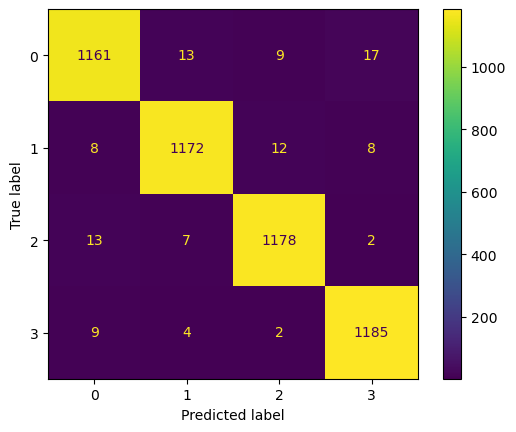

In [54]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test,y_pred_pre)